# 2015 Flight Delays and Cancellations
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report.

The dataset contains attributes such as month, day, day of week, airline, flight number, tail number, origin airport, destination airport, scheduled departure time, scheduled duration of flight, distance between airports, scheduled arrival time, arrival delay, diverted or not, cancelled or not etc. It contains about 6 million data points. 
1.	We aim to use these features to classify whether a flight would be delayed or not. 
2.	 We also aim to predict the delay that might occur for a particular flight using regression. 
3.	We will also be comparing the accuracy of a few algorithms for the classification problem.
4.	We would try to gain an understanding about which features have the highest impact on the accuracy of the predictions.
5.	Apart from this we will also see what the impact on the predictions would be upon omitting the training data for the past few days corresponding to the test data. We would also explore the financial implications or opportunities from our findings.

Link to the dataset: https://www.kaggle.com/usdot/flight-delays?select=flights.csv

Let's get started!

### Getting Started
We'll begin by exploring the data, finding any `NULL` values, figuring out how to deal with them, and finally doing basic data cleaning. Once we have a cleaned dataset, we ought to be good to do basic EDA using visualisations.

Let's start by importing relavant python libraries and reading the `flights.csv` file into a `pandas.DataFrame` object called `data`.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import zipfile

In [2]:
# Enter correct file location to read flights.csv -
# filename = zipfile.ZipFile('flights.zip')
# path = filename.open('/content/drive/MyDrive/Colab Notebooks/CDS Group Project/flights.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CDS Group Project/flights.csv')
#data = pd.read_csv('D:\ISI\CDS\project\flights.csv')

FileNotFoundError: ignored

In [ ]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

data["DESTINATION_AIRPORT"].count()

5819079

## Data Cleaning
We start by checking for `NULL` values in our dataset.

We observe that there many attributes having a high number of `NULL` values. We do manual inspection to see whether the `NULL` values ar a result of some data discrepancy, or the `NULL` values can be modiefied (or removed) somehow to make our data `not-NULL`.

In [ ]:
data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

### Removing `CANCELLED` Flights
On inspection, we observe that most of the `NULL` values in the `DEPARTURE_TIME`, `DEPARTURE_DELAY`, `TAXI_OUT` and `WHEELS_OFF` features are because the respective flight itself had got cancelled, and as a result the flight's departure could not take place. 

Since we wish to start by analysing the flight data for any patterns of flight delay first, we will make a new dataframe object called `delay_data`, that will contain only those flights which were not cancelled. By doing this, we will be able to not only focus on the delay aspect of flight, but also elminate a lot of `NULL` values in the aforementioned attributes corresponding to cancelled flights.

Subsequently, we shall also drop the `CANCELLED` and `CANCELLATION REASON` features from our `delay_data` dataframe object.

In [ ]:
data['CANCELLED'].value_counts()

0    5729195
1      89884
Name: CANCELLED, dtype: int64

In [ ]:
# Making a copy of the data, in which we will segregate the DELAY data only, and ignore the CANCELLED DATA.
# The motive behind doing this is to focus the analysis to analyse the delay pattern of flight.

delay_data = data[data['CANCELLED'] == 0].copy()
delay_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dropping `CANCELLED` and `CANCELLATION_REASON` columns -

delay_data = delay_data.drop(columns = ['CANCELLED','CANCELLATION_REASON'])

In [ ]:
# Number of Unique Count per Feature -

for col in delay_data.columns:
    print(col," : ",len(delay_data[col].unique()))

YEAR  :  1
MONTH  :  12
DAY  :  31
DAY_OF_WEEK  :  7
AIRLINE  :  14
FLIGHT_NUMBER  :  6947
TAIL_NUMBER  :  4896
ORIGIN_AIRPORT  :  929
DESTINATION_AIRPORT  :  930
SCHEDULED_DEPARTURE  :  1320
DEPARTURE_TIME  :  1440
DEPARTURE_DELAY  :  1215
TAXI_OUT  :  184
WHEELS_OFF  :  1440
SCHEDULED_TIME  :  550
ELAPSED_TIME  :  713
AIR_TIME  :  676
DISTANCE  :  1361
WHEELS_ON  :  1441
TAXI_IN  :  186
SCHEDULED_ARRIVAL  :  1435
ARRIVAL_TIME  :  1441
ARRIVAL_DELAY  :  1241
DIVERTED  :  2
AIR_SYSTEM_DELAY  :  571
SECURITY_DELAY  :  155
AIRLINE_DELAY  :  1068
LATE_AIRCRAFT_DELAY  :  696
WEATHER_DELAY  :  633


In [ ]:
print(delay_data.shape)
delay_data.isnull().sum()

(5729195, 29)


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               1
ELAPSED_TIME             15187
AIR_TIME                 15187
DISTANCE                     0
WHEELS_ON                 2629
TAXI_IN                   2629
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              2629
ARRIVAL_DELAY            15187
DIVERTED                     0
AIR_SYSTEM_DELAY       4665756
SECURITY_DELAY         4665756
AIRLINE_DELAY          4665756
LATE_AIRCRAFT_DELAY    4665756
WEATHER_DELAY          4665756
dtype: int64

### Removing `DIVERTED` Flights
On inspection, we observe that most of the `NULL` values in the `ELAPSED_TIME`, `AIR_TIME`, `WHEELS_ON`, `TAXI_IN`, `ARRIVAL_TIME` and `ARRIVAL_DELAY` features are because the respective flight itself had got `DIVERTED`, and as a result these values could not be captured systematically. 

Since there is no data for the delay for these flights mentioned, and since these flights form a very small proportion of the total number of flights (15,187 / 5,729,195 = `0.26%` data), we can ignore these data with the assumption that this will hardly affect our final results.

In [ ]:
data['DIVERTED'].value_counts()

0    5803892
1      15187
Name: DIVERTED, dtype: int64

In [ ]:
delay_data = delay_data[delay_data['DIVERTED'] == 0].copy()

In [ ]:
delay_data[delay_data['ARRIVAL_DELAY'] < 15].isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

### Removing `NULL` Values due to Flight Delay
**NOTE**: On further inspection, we can see that for all flights having `ARRIVAL_DELAY` < 15 minutes, the `AIR_SYSTEM_DELAY`, `SECURITY_DELAY`, `AIRLINE_DELAY`, `LATE_AIRCRAFT_DELAY` and `WEATHER_DELAY`for those respective flights are `NULL`, while for flights having `ARRIVAL_DELAY` >= 15 minutes, the values for the mentioned columns are `not-NULL`.

Thus, we need to decide what to do with these 4,650,569 `NULL` values per column in the last 5 columns.

Here we make another reasonable assumption - if the `ARRIVAL_DELAY` is less than 15 minutes, we can treat the flight as not being delayed. By doing this, we can fill the `NULL` values in the last 5 delay columns as = `0`. 

Thus, our database should have no `NULL` values. Let's have a look -

In [ ]:
data[data['ARRIVAL_DELAY'] < 15]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
delay_data.iloc[:,-5:] = delay_data.iloc[:,-5:].copy().fillna(0)

In [ ]:
delay_data.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [ ]:
print(delay_data.shape)
delay_data.head()

(5714008, 29)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0.0,0.0,0.0,0.0,0.0


## Feature Engineering
Now that our data is cleaned and has no `NULL` values, we start by creating another attribute, which tells us whether or not a flight has been delayed. We name this attribute `DELAYED`, which is a binary attribute.

For delayed flights ---------> 1<br>
For non-delayed flights ---> 0

We assign `1` and `0` depending on whether a flight was delayed by more than 15 minutes or not.

In [ ]:
delay_data.loc[delay_data['ARRIVAL_DELAY'] >= 15,'DELAYED'] = 1
delay_data.loc[delay_data['ARRIVAL_DELAY'] < 15,'DELAYED'] = 0

In [ ]:
delay_data['DELAYED'].value_counts()

0.0    4650569
1.0    1063439
Name: DELAYED, dtype: int64

**NEXT STEP:**

In [ ]:
delay_data.iloc[:,15:].head()

,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = delay_data.copy()

In [ ]:
df.shape

(5714008, 30)

In [ ]:
df = df.drop(columns = ['YEAR','FLIGHT_NUMBER','TAIL_NUMBER','TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN','DIVERTED'])

In [ ]:
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,-22.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,281.0,258.0,2342,805,756.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,215.0,199.0,1448,320,259.0,-21.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.0, 0.3)

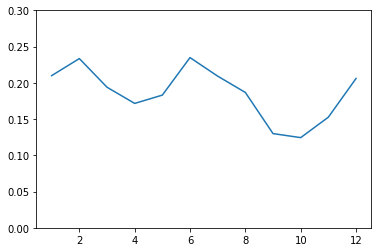

In [ ]:
plt.plot(df.groupby('MONTH')['DELAYED'].sum() / df.groupby('MONTH')['DELAYED'].count())
plt.ylim(0,0.3)

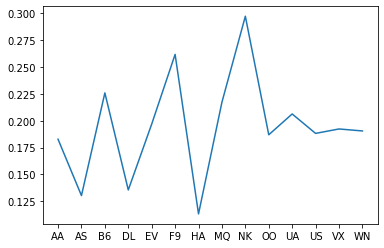

In [ ]:
plt.plot(delay_data.groupby('AIRLINE')['DELAYED'].sum() / delay_data.groupby('AIRLINE')['DELAYED'].count())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


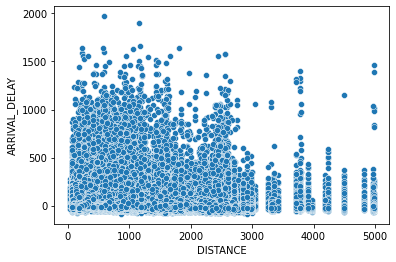

In [ ]:
sns.scatterplot(df['DISTANCE'],df['ARRIVAL_DELAY'])

In [ ]:
(df['ARRIVAL_DELAY'].copy()*(1*df['ARRIVAL_DELAY']>0)).head(30)

0     -0.0
1     -0.0
2      5.0
3     -0.0
4     -0.0
5      8.0
6     -0.0
7     -0.0
8     -0.0
9     -0.0
10    -0.0
11    -0.0
12    -0.0
13    -0.0
14     8.0
15    -0.0
16    -0.0
17    -0.0
18    -0.0
19    -0.0
20     6.0
21     1.0
22    -0.0
23    -0.0
24    -0.0
25    -0.0
26    -0.0
27    25.0
28    -0.0
29     2.0
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
temp = df[['AIRLINE','ARRIVAL_DELAY']].copy()
temp['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].copy()*(1*df['ARRIVAL_DELAY']>0)

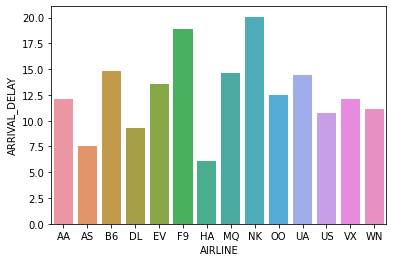

In [ ]:
temp2 = temp.groupby('AIRLINE', as_index = False).mean()
sns.barplot(x = temp2['AIRLINE'], y = temp2['ARRIVAL_DELAY'])

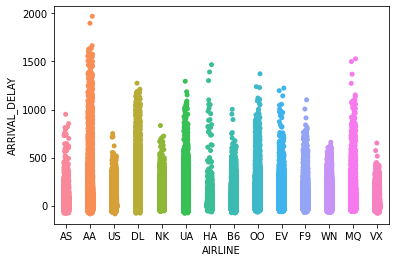

In [ ]:
sns.stripplot(x = 'AIRLINE', y = 'ARRIVAL_DELAY', data = df)

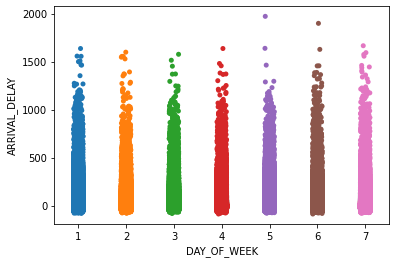

In [ ]:
sns.stripplot(x = 'DAY_OF_WEEK', y = 'ARRIVAL_DELAY', data = df)

In [ ]:
x = df[['DAY_OF_WEEK','DELAYED']].groupby('DAY_OF_WEEK').sum()/df[['DAY_OF_WEEK','DELAYED']].groupby('DAY_OF_WEEK').count()

In [ ]:
list(x.iloc[:,0])

[0.19751388106828988,
 0.18272079129899843,
 0.18215885831113726,
 0.20013381731372235,
 0.19197027908577416,
 0.15993591834663534,
 0.18308776345546413]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Proportion of Delayed Flights (Day of Week  wise)')

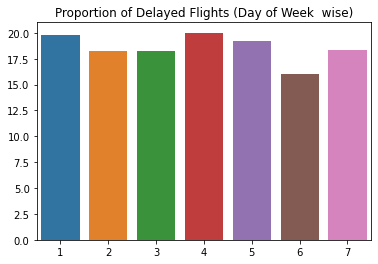

In [ ]:
sns.barplot(list(x.index), list(100*x.iloc[:,0]))
plt.title("Proportion of Delayed Flights (Day of Week  wise)")

In [ ]:
x

,DELAYED
DAY_OF_WEEK,
1,0.197514
2,0.182721
3,0.182159
4,0.200134
5,0.191970
6,0.159936
7,0.183088


In [ ]:
delay_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
delay_data.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
DELAYED                0
dtype: int64

In [ ]:
delay_data[delay_data['SECURITY_DELAY'] == 0].shape

(5710524, 30)

In [ ]:
delay_data[delay_data['SECURITY_DELAY'] == 0].shape

(5710524, 30)

Refer this URL for weather Data - https://www.kaggle.com/selfishgene/historical-hourly-weather-data

In [ ]:
delay_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(delay_data['ORIGIN_AIRPORT'].unique())

929

In [ ]:
airports = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CDS Group Project/airports.csv")

In [ ]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
new_data = pd.merge(delay_data,airports, how="left", left_on="ORIGIN_AIRPORT", right_on="IATA_CODE")

In [ ]:
new_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,0.0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,0.0,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0.0,0.0,0.0,0.0,0.0,0.0,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [ ]:
new_data.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
TAXI_OUT                    0
WHEELS_OFF                  0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
WHEELS_ON                   0
TAXI_IN                     0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
ARRIVAL_DELAY               0
DIVERTED                    0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
DELAYED                     0
IATA_CODE              482878
AIRPORT                482878
CITY                   482878
STATE     

Next, we remove the rows which don't have the LAT/LONG corresponding to them (corresponds to only 8% of the data), and since the flights taking off from these airports are very small in number, we can safely reject these rows, and limit our analysis to the remaining rows.

In [ ]:
new_data[new_data['LATITUDE'].isnull()].groupby('ORIGIN_AIRPORT').count()

NameError: ignored

[[0.00813971]] [-6.4098661]
0.010043973056522826
1526.7443437116829
0.011578248694442461
MSE(mean squared error) 1524.3781308818861


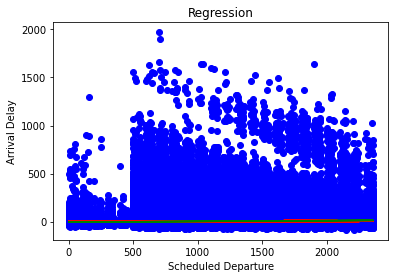

In [ ]:
#linear model with one variable
X = np.array(delay_data['SCHEDULED_DEPARTURE'])
Y=np.array((delay_data['ARRIVAL_DELAY']))
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X,Y)
print(regr.coef_,regr.intercept_)
print(regr.score(X,Y))
print(np.square(np.subtract(Y,X*regr.coef_+regr.intercept_)).mean())

#Polynomial model with one variable
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, Y)
lin2 = LinearRegression()
lin2.fit(X_poly,Y)
print(lin2.score(X_poly,Y))
print("MSE(mean squared error)", mean_squared_error(Y,lin2.predict(X_poly)))

#Visualising Linear and Polynomial Regression
plt.scatter(X, Y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.plot(X, regr.predict(X), color = 'green') 
plt.title('Regression') 
plt.xlabel('Scheduled Departure') 
plt.ylabel('Arrival Delay') 
  
plt.show()


In [ ]:
#linear model with two variables
X=np.array([[delay_data['DEPARTURE_DELAY']],[delay_data['SCHEDULED_DEPARTURE']]])
Y=np.array((delay_data['ARRIVAL_DELAY']))
X=X.reshape(len(delay_data['AIR_TIME']),2)
Y=Y.reshape(len(Y),1)
regr=sklearn.linear_model.LinearRegression()
regr.fit(X,Y)
print(regr.coef_,regr.intercept_)
print(regr.score(X,Y))
print(np.square(np.subtract(Y,X*regr.coef_+regr.intercept_)).mean())

#polynomial model with two variables
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, Y)
lin2 = LinearRegression()
lin2.fit(X_poly,Y)
print(lin2.score(X_poly,Y))
print("MSE(mean squared error)", mean_squared_error(Y,lin2.predict(X_poly)))


[[-0.00020802 -0.00174891]] [5.71643465]
0.0013726189414970946
1541.6695293755474
0.001742008794876626
MSE(mean squared error) 1539.5479194596878


AttributeError: ignored

In [ ]:
#Decision Tree Classifier (Model 1)
new_data=delay_data.drop(['AIRLINE','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF',
                          'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY'
                          ,'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1)
class_data = new_data.values
X, Y = class_data[:,:-1], class_data[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
scaled_features = StandardScaler().fit_transform(X_train, X_test)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score  

ValueError: ignored

[[-0.00124219 -0.00125219]] [5.61228146]
0.0009125138563231827


In [4]:
#Data Preparation (OHE, Normalization etc) (Executing Only this Block is sufficient before running the models in the next 2 code blocks)
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CDS Group Project/flights.csv")
df['SCHEDULED_DEPARTURE'] = (df['SCHEDULED_DEPARTURE']//100).astype(int)*60 +df['SCHEDULED_DEPARTURE']%100
df['SCHEDULED_ARRIVAL'] = (df['SCHEDULED_ARRIVAL']//100)*60 +df['SCHEDULED_ARRIVAL']%100
df = df [df['CANCELLED'] == 0 ]
df = df[df['DIVERTED'] == 0]
Y = np.array(df.ARRIVAL_DELAY).reshape(df.shape[0],1)
Y1=Y
Y=(Y>5).astype(int)
df.iloc[:,:] = df.iloc[:,:].fillna(0)
df = df.drop(['YEAR','FLIGHT_NUMBER','TAIL_NUMBER','DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF','ELAPSED_TIME', 'AIR_TIME','WHEELS_ON', 'TAXI_IN','ARRIVAL_TIME','DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],axis=1)
df['ROUTE'] = df['ORIGIN_AIRPORT'].astype(str)+df['DESTINATION_AIRPORT'].astype(str)
origin = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CDS Group Project/By_origin_Airport.xlsx')
departure = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CDS Group Project/By_destination_Airport.xlsx')
route = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/CDS Group Project/By_ROUTE.xlsx")
route.columns = ('ROUTE','ROUTE CATEGORY')
departure.columns = ('DESTIN','CAT')
origin.columns = ('ORIGIN_AIRPORT', 'OR_CAT')
ro_dict = pd.Series(route['ROUTE CATEGORY'].values,index=route.ROUTE).to_dict()
or_dict = pd.Series(origin.OR_CAT.values,index=origin.ORIGIN_AIRPORT).to_dict()
dep_dict = pd.Series(departure.CAT.values,index=departure.DESTIN).to_dict()
df['OR_CAT']=np.array([or_dict.get(x) for x in df.ORIGIN_AIRPORT])
df['DES_CAT'] = np.array([dep_dict.get(x) for x in df.DESTINATION_AIRPORT])
df['ROUTE_CAT'] = np.array([ro_dict.get(x) for x in df.ROUTE])
df = df.drop(["ORIGIN_AIRPORT","DESTINATION_AIRPORT","ROUTE",'ARRIVAL_DELAY'],axis=1)
df_cat = df[['AIRLINE','OR_CAT','DES_CAT','ROUTE_CAT']].astype(str).copy()
df = df.drop(['AIRLINE','OR_CAT','DES_CAT','ROUTE_CAT'],axis=1)
mu  = 1/df.shape[0]*np.sum(df,axis=0)
print(mu)
sigma = np.sqrt(1/df.shape[0]*np.sum(np.square(df-mu),axis=0))
print(sigma)
df = np.divide(df-mu,sigma)
from sklearn import preprocessing as prep
le = prep.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
enc = prep.OneHotEncoder()
enc.fit(df_cat)
df_cat = pd.DataFrame.sparse.from_spmatrix(enc.transform(df_cat))
df.reset_index(drop=True, inplace=True)
df_cat.reset_index(drop=True, inplace=True)
X = df.join(df_cat)
del df
del df_cat
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
del X

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MONTH                    6.547799
DAY                     15.707591
DAY_OF_WEEK              3.932643
SCHEDULED_DEPARTURE    808.019778
SCHEDULED_TIME         141.893974
DISTANCE               824.456903
SCHEDULED_ARRIVAL      907.450162
dtype: float64
MONTH                    3.397421
DAY                      8.774393
DAY_OF_WEEK              1.985967
SCHEDULED_DEPARTURE    290.853224
SCHEDULED_TIME          75.313991
DISTANCE               608.661936
SCHEDULED_ARRIVAL      304.365088
dtype: float64


In [ ]:
#Decision Tree Classifier for Delay or Not Delay (Model 2)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score 

0.5808630672794504

In [5]:
#Random Forest Classifier for Delay or Not Delay 
clf = RandomForestClassifier(max_depth=6)
clf = clf.fit(X_train,y_train)
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6341967358793115